In [1]:
from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn.ensemble import BaggingClassifier                         # Import bagging classifier
from sklearn import tree                                               # Visualize the decision tree
from sklearn.linear_model import LogisticRegression                    # Import Logistic Regression
from sklearn.ensemble import RandomForestClassifier                    # Import random forest classifier
from sklearn.ensemble import AdaBoostClassifier                        # Import Ada boost classifier
from sklearn.ensemble import GradientBoostingClassifier                # Import Gradient boost classifier
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
credit_card = pd.read_csv('defaulter_client.csv', index_col = 0)
credit_card 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [3]:
# Idnetify all the categorical variables in the data

category_data = credit_card.select_dtypes(include = "object").columns
print (category_data)

Index([], dtype='object')


In [4]:
category_data.isnull()

array([], dtype=bool)

In [5]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in category_data:
    credit_card[col] = le.fit_transform(df[col].astype(str))
    #df[feat] = df[feat].astype(int)
    
print (credit_card.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
# Create class(y) and features(X) from the dataset

y = credit_card['default_payment_next_month']
X = credit_card.drop('default_payment_next_month',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# scale numeric columns and perform the logistic regression

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [8]:
# Logistic Regression

logic_class = logistic_pipeline
logic_class.fit(X_train, y_train)
y_pred = logic_class.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6897  163]
 [1492  448]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7060
           1       0.73      0.23      0.35      1940

    accuracy                           0.82      9000
   macro avg       0.78      0.60      0.62      9000
weighted avg       0.80      0.82      0.78      9000



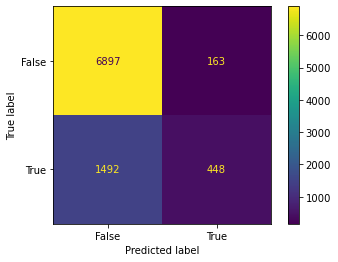

In [10]:
conf_mat = confusion_matrix(y_test, y_pred)
confmat_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])

confmat_display.plot()
plt.show()

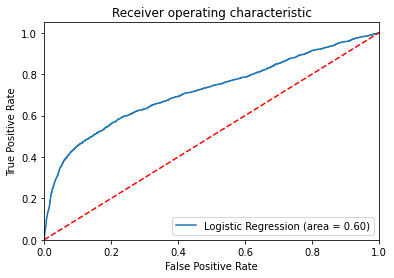

In [11]:
logit_roc_auc = roc_auc_score(y_test, logic_class.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logic_class.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [12]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.816111
Precision: 0.733224
Recall: 0.230928
F1 score: 0.351235


In [13]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

C:\Users\ghost\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [14]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [15]:
# Decision Tree
g = credit_card['default_payment_next_month']
A = credit_card.drop('default_payment_next_month',axis=1)

[Text(0.6796394863915716, 0.9545454545454546, 'X[5] <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.49491055750658475, 0.8636363636363636, 'X[6] <= 1.5\ngini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.2949681738366989, 0.7727272727272727, 'X[19] <= 678.5\ngini = 0.245\nsamples = 24599\nvalue = [21085, 3514]'),
 Text(0.15303994732221246, 0.6818181818181818, 'X[11] <= 530.0\ngini = 0.339\nsamples = 6776\nvalue = [5312, 1464]'),
 Text(0.0733099209833187, 0.5909090909090909, 'X[20] <= 3.5\ngini = 0.4\nsamples = 2664\nvalue = [1929, 735]'),
 Text(0.041044776119402986, 0.5, 'X[4] <= 55.5\ngini = 0.427\nsamples = 1645\nvalue = [1136, 509]'),
 Text(0.022388059701492536, 0.4090909090909091, 'X[0] <= 25000.0\ngini = 0.419\nsamples = 1583\nvalue = [1111, 472]'),
 Text(0.009657594381035996, 0.3181818181818182, 'X[12] <= 102.0\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(0.0052677787532923615, 0.22727272727272727, 'X[16] <= 651.0\ngini = 0.493\nsamp

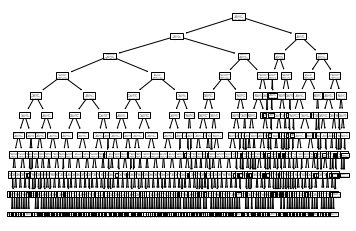

In [16]:
tree_class = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_class.fit(A, g)
tree.plot_tree(tree_class)

In [17]:
A_train, A_test, g_train, g_test = train_test_split(A, g, test_size = .2, random_state = 42)

tree_class.fit(A_train, g_train)
g_pred = tree_class.predict(A_test)

print(confusion_matrix(g_test, g_pred))
print(classification_report(g_test, g_pred))

[[4409  278]
 [ 854  459]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.62      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



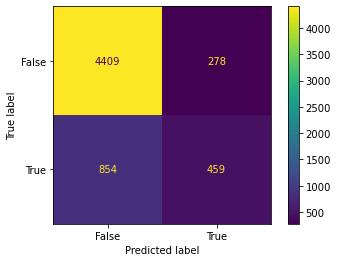

In [18]:
confu_mat = confusion_matrix(g_test, g_pred)
confumat_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu_mat, display_labels = [False, True])

confumat_display.plot()
plt.show()

Accuracy: 0.811333
Precision: 0.622795
Recall: 0.349581
F1 score: 0.447805
ROC AUC: 0.737658


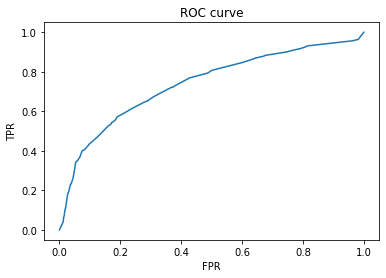

In [19]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(g_test, g_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(g_test, g_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(g_test, g_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(g_test, g_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
g_hat = tree_class.predict_proba(A_test)
auc = roc_auc_score(g_test, g_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(g_test, g_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [20]:
model = DecisionTreeClassifier()
max_depth = [2,4,6,8]
max_leaf_node = [4,6,8]
min_impurity_decrease = [0.01,0.05]
#param_dict = {"max_depth":range(1,10),"max_depth_node":range(1,10),"min_impurity_decrease": list(min_impurity_decrease)}

# define grid search
grid = dict(max_depth=max_depth,min_impurity_decrease=min_impurity_decrease, max_leaf_nodes=max_leaf_node)

grid_search = GridSearchCV(model, param_grid =grid, cv=10, n_jobs=-1)
grid_result = grid_search.fit(A, g)

In [21]:
grid_result.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.01}

In [22]:
# Random Forest Classifier
t = credit_card['default_payment_next_month']
H = credit_card.drop('default_payment_next_month',axis=1)
H_train, H_test, t_train, t_test = train_test_split(H, t, test_size = .2, random_state = 42)

In [23]:
rand_class = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rand_class.fit(H_train, t_train)

t_pred_rf = rand_class.predict(H_test)

Accuracy: 0.817333
Precision: 0.686747
Recall: 0.303884
F1 score: 0.421331
ROC AUC: 0.770265


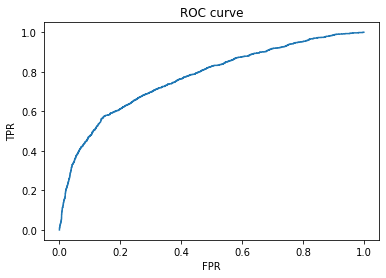

In [25]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(t_test, t_pred_rf)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(t_test, t_pred_rf)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(t_test, t_pred_rf)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(t_test, t_pred_rf)
print('F1 score: %f' % f1)
 
    
# ROC AUC
t_hat = rand_class.predict_proba(H_test)
auc = roc_auc_score(t_test, t_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(t_test, t_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [26]:
std_sclr = StandardScaler()
pipe = Pipeline(steps=('std_slc', std_sclr))

In [27]:
model_rand= RandomForestClassifier()
max_depth = [2,4,6]
max_leaf_node = [4,6,8]
n_estimators= [100,125,150]

# define grid search
grid_rand = dict(max_depth=max_depth, n_estimators = n_estimators, max_leaf_nodes=max_leaf_node)

grid_rand_search = GridSearchCV(model_rand,param_grid =grid_rand)
grid_rand_result = grid_rand_search.fit(H, t)

In [29]:
grid_rand_result.best_params_

{'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 100}

In [30]:
# Bagging
bag_class = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_class.fit(H_train, t_train)
t_pred = bag_class.predict(H_test)

In [31]:
np.sum(t_pred == t_pred_rf) / len(t_pred)  # very similar predictions

0.9961666666666666

In [32]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier

ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_class.fit(H_train, t_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [33]:
#Gradiant

gb_class = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state = 0)
gb_class.fit(H_train, t_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=0)

Logistic Regression ROC AUC: 0.603920
Tree Forest ROC AUC: 0.737658
Random ROC AUC: 0.770265
Ada boost - ROC AUC: 0.777442
Gradient boost - ROC AUC: 0.766224


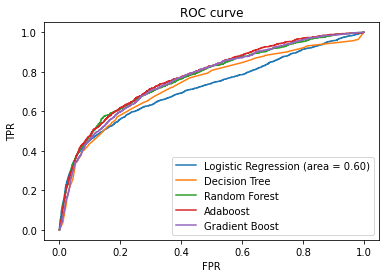

In [43]:
# ROC AUC

y_pred = logic_class.predict(X_test)
g_hat = tree_class.predict_proba(A_test)
t_rand_hat = rand_class.predict_proba(H_test)
t_hat = ada_class.predict_proba(H_test)
t_hat_gb = gb_class.predict_proba(H_test)


logit_roc_auc = roc_auc_score(y_test, logic_class.predict(X_test))
print('Logistic Regression ROC AUC: %f' %logit_roc_auc)

auc = roc_auc_score(g_test, g_hat[:,1])
print('Tree Forest ROC AUC: %f' % auc)

auc = roc_auc_score(t_test, t_rand_hat[:,1])
print('Random ROC AUC: %f' % auc)

auc = roc_auc_score(t_test, t_hat[:,1])
print('Ada boost - ROC AUC: %f' % auc)

auc = roc_auc_score(t_test, t_hat_gb[:,1])
print('Gradient boost - ROC AUC: %f' % auc)


fpr_logic, tpr_logic, thresholds = roc_curve(y_test, logic_class.predict_proba(X_test)[:,1])
fpr_tree, tpr_tree, _ = metrics.roc_curve(g_test, g_hat[:,1])
fpr_rand, tpr_rand, _ = metrics.roc_curve(t_test, t_rand_hat[:,1])
fpr, tpr, _ = metrics.roc_curve(t_test, t_hat[:,1])
fpr_gb, tpr_gb, _ = metrics.roc_curve(t_test, t_hat_gb[:,1])

plt.clf()
plt.plot(fpr_logic, tpr_logic, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_tree, tpr_tree, label = "Decision Tree")
plt.plot(fpr_rand, tpr_rand, label ="Random Forest")
plt.plot(fpr, tpr, label="Adaboost")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boost")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()


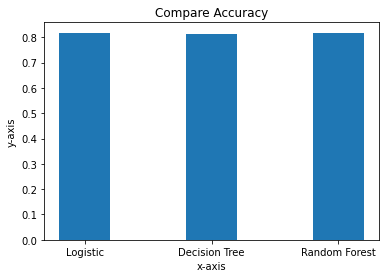

In [44]:
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y_test, y_pred)
# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(g_test, g_pred)
# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(t_test, t_pred)

yy = [accuracy1,accuracy2,accuracy3]
xx = ["Logistic","Decision Tree","Random Forest"]
plt.bar(xx,yy, width =0.4)
plt.xlabel ("x-axis")
plt.ylabel ("y-axis")
plt.title ('Compare Accuracy')
plt.show()

According the analyzed data, all methods have the almost same accuracy rate. But Adaboost AUC ROC are the highest curve among others models hence I would recommend to apply Adaboost methods.